In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("EastWestAirlines.csv")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [33]:
from sklearn.cluster import KMeans

In [ ]:
# finding the exact number of clusters using elbow method

In [42]:
z = []

In [43]:
X = df.iloc[:,:].values
X

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [44]:
for i in range(1,15):
    kmeans= KMeans(n_clusters=i,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    precompute_distances='auto',
    verbose=0,
    random_state=None,
    copy_x=True,
    n_jobs=None,
    algorithm='auto',
    )
    kmeans.fit(X)
    z.append(kmeans.inertia_)

In [45]:
z

[42967206847420.69,
 20828852094270.242,
 11795939390504.43,
 7554603310306.339,
 5729561204996.027,
 4546484325059.204,
 3702695092057.922,
 3276942745568.143,
 2906672709530.683,
 2638156717503.018,
 2385245695436.8584,
 2148578130344.4885,
 1969676812660.689,
 1834594832874.6648]

Text(0, 0.5, 'z')

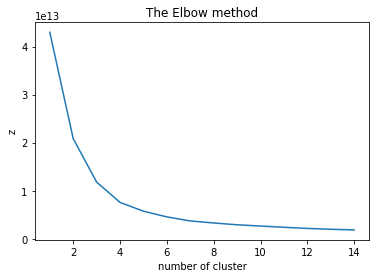

In [47]:
plt.plot(range(1,15),z)
plt.title("The Elbow method")
plt.xlabel("number of cluster")
plt.ylabel("z")


In [50]:
#Applying KMeans to the dataset
kmeans= KMeans(n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    precompute_distances='auto',
    verbose=0,
    random_state=None,
    copy_x=True,
    n_jobs=None,
    algorithm='auto',
    )


In [52]:
Y_kmeans = kmeans.fit_predict(X)
Y_kmeans

array([1, 1, 1, ..., 1, 1, 1])

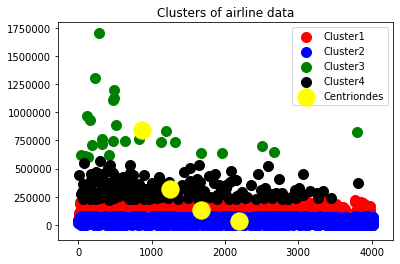

In [55]:
#Visulizing the cluster
plt.scatter(X[Y_kmeans == 0,0],X[Y_kmeans == 0,1],s =100,c = 'red',label = 'Cluster1' )
plt.scatter(X[Y_kmeans == 1,0],X[Y_kmeans == 1,1],s =100,c = 'blue',label = 'Cluster2' )
plt.scatter(X[Y_kmeans == 2,0],X[Y_kmeans == 2,1],s =100,c = 'green',label = 'Cluster3' )
plt.scatter(X[Y_kmeans == 3,0],X[Y_kmeans == 3,1],s =100,c = 'black',label = 'Cluster4' )
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c = 'Yellow',label = 'Centriondes' )
plt.title("Clusters of airline data")
plt.legend()
plt.show()